
# Koppla optiktrim1 med OSD1
Hämtar data senaste 6mnd, kommer få float, så inte binär input data.
Pelare kan väljas som kategorisk data.


In [17]:
# Alt1
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
#import helper

# Define a transform to normalize the data


df = pd.read_csv('C:/Sally felsokning/T4D/Limbo_data6m.csv')
features = df.drop(['AdjIt'], axis=1)

features = features.drop(['Unit','Date','Station', 'Rx3Alignment','OA_EDMRange','OSD_EDMRange','SignalDependency','RatioPosPreAd', 'RatioNegPreAd'], axis=1)

dummy_fields = ['OA_Pillar', 'OSD_Pillar']
for each in dummy_fields:
    dummies = pd.get_dummies(features[each], prefix=each, drop_first=False)
    features = pd.concat([features, dummies], axis=1)
features=features.drop(['OA_Pillar','OSD_Pillar'], axis=1)
#features.OA_Pillar = features.OA_Pillar*0.01
#features.OSD_Pillar = features.OSD_Pillar*0.01
target = df[['AdjIt']].astype(int)
target.AdjIt = np.where(target.AdjIt == 0,0,1) #0==Pass, 1==FAIL
#print('features',features.dtypes, 'target',target.dtypes)
features = features.dropna()
print(len(features))
features.head(3)
#target.head(6)

# Separate the data into features and targets
#target_fields = ['AdjIt']
#features, targets = data.drop(target_fields, axis=1), data[target_fields]
#test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
459


,Rx3-19,Rx3-16,Rx3-14,Rx3-7,Rx3-1,Rx3+1,Rx3+7,Rx3+14,Rx3+16,Rx3+19,...,Range+19,Range+20,OA_Pillar_11,OA_Pillar_12,OA_Pillar_13,OA_Pillar_14,OA_Pillar_15,OSD_Pillar_21,OSD_Pillar_22,OSD_Pillar_23
0,439.272356,378.036771,338.209188,270.136587,252.924230,253.460033,263.890961,376.278889,431.189552,499.240761,...,532.311776,479.975336,0,1,0,0,0,0,0,1
1,669.854426,568.859950,475.666909,360.397555,359.941866,364.987486,420.109169,637.548549,697.783610,745.546140,...,673.421546,601.009384,1,0,0,0,0,0,0,1
2,573.059004,499.171933,446.238649,392.510991,403.716161,405.477667,475.825242,583.917407,593.394368,593.568082,...,559.562817,480.433346,0,0,0,0,1,1,0,0


In [2]:
#Alt2
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
#fixar vektoriseringen och normalisering
df = pd.read_csv('C:/Sally felsokning/T4D/Limbo_data6m.csv')
test_data = df[200:220]
df = df.dropna()
df.loc[~(df==0).all(axis=1)]
# print(df.tail(2), df.shape)
data = df.copy()
data = data.drop(['Unit','Date','Station', 'Rx3Alignment','OA_EDMRange','OSD_EDMRange','SignalDependency'], axis=1)
data['Rx3_avg'] = (data['Rx3-1'] + data['Rx3+1'])/2
data['Rx3-19'] = data['Rx3-19']/data['Rx3_avg'] 
data['Rx3-16'] = data['Rx3-16']/data['Rx3_avg'] 
data['Rx3-14'] = data['Rx3-14']/data['Rx3_avg'] 
data['Rx3-7'] = data['Rx3-7']/data['Rx3_avg'] 
data['Rx3-1'] = data['Rx3-1']/data['Rx3_avg'] 
data['Rx3+1'] = data['Rx3+1']/data['Rx3_avg'] 
data['Rx3+7'] = data['Rx3+7']/data['Rx3_avg'] 
data['Rx3+14'] = data['Rx3+14']/data['Rx3_avg'] 
data['Rx3+16'] = data['Rx3+16']/data['Rx3_avg'] 
data['Rx3+19'] = data['Rx3+19']/data['Rx3_avg'] 
data['Range_avg'] = (data['Range-1']+data['Range+1'])/2
data['Range-20'] = data['Range-20']/ data['Range_avg']
data['Range-19'] = data['Range-19']/ data['Range_avg']
data['Range-16'] = data['Range-16']/ data['Range_avg']
data['Range-14'] = data['Range-14']/ data['Range_avg']
data['Range-12'] = data['Range-12']/ data['Range_avg']
data['Range-10'] = data['Range-10']/ data['Range_avg']
data['Range-7'] = data['Range-7']/ data['Range_avg']
data['Range-5'] = data['Range-5']/ data['Range_avg']
data['Range-3'] = data['Range-3']/ data['Range_avg']
data['Range-1'] = data['Range-1']/ data['Range_avg']
data['Range+1'] = data['Range+1']/ data['Range_avg']
data['Range+3'] = data['Range+3']/ data['Range_avg']
data['Range+5'] = data['Range+5']/ data['Range_avg']
data['Range+7'] = data['Range+7']/ data['Range_avg']
data['Range+10'] = data['Range+10']/ data['Range_avg']
data['Range+12'] = data['Range+12']/ data['Range_avg']
data['Range+14'] = data['Range+14']/ data['Range_avg']
data['Range+16'] = data['Range+16']/ data['Range_avg']
data['Range+19'] = data['Range+19']/ data['Range_avg']
data['Range+20'] = data['Range+20']/ data['Range_avg']
data.head()


dummy_fields = ['OA_Pillar', 'OSD_Pillar']
for each in dummy_fields:
    dummies = pd.get_dummies(data[each], prefix=each, drop_first=False)
    data = pd.concat([data, dummies], axis=1)
data=data.dropna()    
features = data.drop(['AdjIt'], axis=1)    
features=features.drop(['OA_Pillar','OSD_Pillar', 'Range_avg','Rx3_avg'], axis=1)
#for i in range (len(df)):
#    avgRx = (df['Rx-1']. iloc[i,] + df['Rx+1'])/2
#    avgRange = (df['Range+1']+df['Range-1'])/2
print(len(features))
features.tail()    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
458


,RatioPosPreAd,RatioNegPreAd,Rx3-19,Rx3-16,Rx3-14,Rx3-7,Rx3-1,Rx3+1,Rx3+7,Rx3+14,...,Range+19,Range+20,OA_Pillar_11,OA_Pillar_12,OA_Pillar_13,OA_Pillar_14,OA_Pillar_15,OSD_Pillar_21,OSD_Pillar_22,OSD_Pillar_23
453,9.280970,8.855811,1.740894,1.636751,1.405293,1.000365,0.992934,1.007066,1.087957,1.527864,...,0.847586,0.653611,0,0,0,1,0,1,0,0
454,7.555613,7.006421,1.727381,1.594182,1.376534,1.057232,0.988067,1.011933,1.084561,1.418498,...,0.829684,0.701645,0,0,1,0,0,0,0,1
455,9.565498,7.494049,1.551715,1.412319,1.230278,1.041635,0.986738,1.013262,1.100310,1.403199,...,0.723623,0.578792,0,0,1,0,0,0,0,1
456,7.657151,8.384908,1.378113,1.353715,1.291093,1.057764,0.997466,1.002534,1.067702,1.268461,...,0.710750,0.591803,0,0,1,0,0,0,0,1
457,3.331157,4.024781,2.145912,1.568082,1.291521,1.080657,1.004176,0.995824,0.971690,1.174185,...,1.299922,1.211437,0,0,1,0,0,0,0,1


In [3]:
test_data.head()

,Unit,Date,Station,OA_Pillar,OSD_Pillar,Rx3Alignment,OA_EDMRange,OSD_EDMRange,SignalDependency,RatioPosPreAd,...,Range+1,Range+3,Range+5,Range+7,Range+10,Range+12,Range+14,Range+16,Range+19,Range+20
200,58310032 00462,2021-03-02 08:51:09.513,Sally_OptSigDepTest1,11,23,3151872,3151874,3152397,3152395,7.941343,...,611.182518,628.314941,631.118791,656.993770,656.898768,663.028571,647.532807,603.667958,535.923920,443.605947
201,58310032 00462,2021-03-02 12:05:34.393,Sally_OptSigDepTest1,11,21,3152434,3152436,3152519,3152517,6.664722,...,652.195478,635.933062,633.865028,634.346591,648.060007,651.455445,646.717939,631.614767,581.661782,462.965102
202,58310032 00463,2021-02-26 07:25:16.517,Sally_OptSigDepTest1,11,23,3149066,3149068,3149232,3149230,5.531830,...,617.281612,614.441521,612.351411,621.365847,621.870366,626.870937,649.972098,636.954490,590.274566,421.370799
203,58310032 00464,2021-02-26 07:40:01.030,Sally_OptSigDepTest1,13,21,3149201,3149203,3149237,3149235,7.707827,...,611.498796,604.349464,615.712855,607.440307,617.285526,624.788480,603.683812,556.733751,483.945626,356.105369
204,58310032 00465,2021-03-01 10:46:11.900,Sally_OptSigDepTest1,13,23,3150090,3150092,3150513,3150511,5.246607,...,536.747632,534.642404,529.373496,541.614715,534.272503,528.182576,533.604827,521.371651,473.793134,413.444060


In [4]:
#Alt2
#df = data.copy()
#features = df.drop(['AdjIt'], axis=1)
#features = features.drop(['Unit','Date','Station', 'Rx3Alignment','OA_EDMRange','OSD_EDMRange','SignalDependency'], axis=1)
#features = features.drop(['Rx3_avg','Range_avg'], axis = 1)
#dummy_fields = ['OA_Pillar', 'OSD_Pillar']
#for each in dummy_fields:
#    dummies = pd.get_dummies(features[each], prefix=each, drop_first=False)
#    features = pd.concat([features, dummies], axis=1)
#features=features.drop(['OA_Pillar','OSD_Pillar'], axis=1)
#features.OA_Pillar = features.OA_Pillar*0.01
#features.OSD_Pillar = features.OSD_Pillar*0.01
target = data[['AdjIt']].astype(int)
target.AdjIt = np.where(target.AdjIt == 0,0,1) #0==Pass, 1==FAIL
#print('features',features.dtypes, 'target',target.dtypes)
print(len(target))
allcolumns=features.columns
print(allcolumns)
quant_features = ['Rx3-19', 'Rx3-16', 'Rx3-14', 'Rx3-7',
       'Rx3-1', 'Rx3+1', 'Rx3+7', 'Rx3+14', 'Rx3+16', 'Rx3+19', 'Range-20',
       'Range-19', 'Range-16', 'Range-14', 'Range-12', 'Range-10', 'Range-7',
       'Range-5', 'Range-3', 'Range-1', 'Range+1', 'Range+3', 'Range+5',
       'Range+7', 'Range+10', 'Range+12', 'Range+14', 'Range+16', 'Range+19',
       'Range+20']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = features[each].mean(), features[each].std()
    scaled_features[each] = [mean, std]
    features.loc[:, each] = (features[each] - mean)/std
features.tail(3)

458
Index(['RatioPosPreAd', 'RatioNegPreAd', 'Rx3-19', 'Rx3-16', 'Rx3-14', 'Rx3-7',
       'Rx3-1', 'Rx3+1', 'Rx3+7', 'Rx3+14', 'Rx3+16', 'Rx3+19', 'Range-20',
       'Range-19', 'Range-16', 'Range-14', 'Range-12', 'Range-10', 'Range-7',
       'Range-5', 'Range-3', 'Range-1', 'Range+1', 'Range+3', 'Range+5',
       'Range+7', 'Range+10', 'Range+12', 'Range+14', 'Range+16', 'Range+19',
       'Range+20', 'OA_Pillar_11', 'OA_Pillar_12', 'OA_Pillar_13',
       'OA_Pillar_14', 'OA_Pillar_15', 'OSD_Pillar_21', 'OSD_Pillar_22',
       'OSD_Pillar_23'],
      dtype='object')


,RatioPosPreAd,RatioNegPreAd,Rx3-19,Rx3-16,Rx3-14,Rx3-7,Rx3-1,Rx3+1,Rx3+7,Rx3+14,...,Range+19,Range+20,OA_Pillar_11,OA_Pillar_12,OA_Pillar_13,OA_Pillar_14,OA_Pillar_15,OSD_Pillar_21,OSD_Pillar_22,OSD_Pillar_23
455,9.565498,7.494049,-0.495851,-0.638722,-0.836205,0.096403,-0.648492,0.648492,0.455625,0.181054,...,-0.102273,0.011712,0,0,1,0,0,0,0,1
456,7.657151,8.384908,-1.129230,-0.940463,-0.410000,0.362161,0.138407,-0.138407,-0.036567,-0.698091,...,-0.107867,0.015193,0,0,1,0,0,0,0,1
457,3.331157,4.024781,1.672041,0.163267,-0.407002,0.739361,0.630538,-0.630538,-1.485809,-1.313224,...,0.148147,0.180964,0,0,1,0,0,0,0,1


In [5]:
# Alt 1
allcolumns=features.columns
print(allcolumns)
quant_features = ['Rx3-19', 'Rx3-16', 'Rx3-14', 'Rx3-7',
       'Rx3-1', 'Rx3+1', 'Rx3+7', 'Rx3+14', 'Rx3+16', 'Rx3+19', 'Range-20',
       'Range-19', 'Range-16', 'Range-14', 'Range-12', 'Range-10', 'Range-7',
       'Range-5', 'Range-3', 'Range-1', 'Range+1', 'Range+3', 'Range+5',
       'Range+7', 'Range+10', 'Range+12', 'Range+14', 'Range+16', 'Range+19',
       'Range+20']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = features[each].mean(), features[each].std()
    scaled_features[each] = [mean, std]
    features.loc[:, each] = (features[each] - mean)/std

Index(['RatioPosPreAd', 'RatioNegPreAd', 'Rx3-19', 'Rx3-16', 'Rx3-14', 'Rx3-7',
       'Rx3-1', 'Rx3+1', 'Rx3+7', 'Rx3+14', 'Rx3+16', 'Rx3+19', 'Range-20',
       'Range-19', 'Range-16', 'Range-14', 'Range-12', 'Range-10', 'Range-7',
       'Range-5', 'Range-3', 'Range-1', 'Range+1', 'Range+3', 'Range+5',
       'Range+7', 'Range+10', 'Range+12', 'Range+14', 'Range+16', 'Range+19',
       'Range+20', 'OA_Pillar_11', 'OA_Pillar_12', 'OA_Pillar_13',
       'OA_Pillar_14', 'OA_Pillar_15', 'OSD_Pillar_21', 'OSD_Pillar_22',
       'OSD_Pillar_23'],
      dtype='object')


In [6]:
train_features, train_targets = features[:-40], target[:-40]
val_features, val_targets = features[-40:], target[-40:]
print(len(train_features),len(val_features))
val_features.tail()
val_features.tail()


418 40


,RatioPosPreAd,RatioNegPreAd,Rx3-19,Rx3-16,Rx3-14,Rx3-7,Rx3-1,Rx3+1,Rx3+7,Rx3+14,...,Range+19,Range+20,OA_Pillar_11,OA_Pillar_12,OA_Pillar_13,OA_Pillar_14,OA_Pillar_15,OSD_Pillar_21,OSD_Pillar_22,OSD_Pillar_23
453,9.280970,8.855811,0.194355,0.516833,0.390351,-0.583587,-0.194004,0.194004,0.269171,0.994468,...,-0.048407,0.031728,0,0,0,1,0,1,0,0
454,7.555613,7.006421,0.145054,0.297653,0.188794,0.353389,-0.551034,0.551034,0.217908,0.280871,...,-0.056186,0.044579,0,0,1,0,0,0,0,1
455,9.565498,7.494049,-0.495851,-0.638722,-0.836205,0.096403,-0.648492,0.648492,0.455625,0.181054,...,-0.102273,0.011712,0,0,1,0,0,0,0,1
456,7.657151,8.384908,-1.129230,-0.940463,-0.410000,0.362161,0.138407,-0.138407,-0.036567,-0.698091,...,-0.107867,0.015193,0,0,1,0,0,0,0,1
457,3.331157,4.024781,1.672041,0.163267,-0.407002,0.739361,0.630538,-0.630538,-1.485809,-1.313224,...,0.148147,0.180964,0,0,1,0,0,0,0,1


In [7]:
import numpy as np


class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))
        self.lr = learning_rate
        
        self.activation_function = lambda x : 1/(1+np.exp(-x))  # 
        
#def sigmoid(self,x): return 1//1+np.exp(-x)
                       

    def train(self, features, targets):

        n_records = features.shape[0]
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        for X, y in zip(features, targets):
            
            final_outputs, hidden_outputs = self.forward_pass_train(X)  # Implement the forward pass function below
            # Implement the backproagation function below
            delta_weights_i_h, delta_weights_h_o = self.backpropagation(final_outputs, hidden_outputs, X, y, 
                                                                        delta_weights_i_h, delta_weights_h_o)
        self.update_weights(delta_weights_i_h, delta_weights_h_o, n_records)


    def forward_pass_train(self, X):
      
        hidden_inputs =np.dot(X, self.weights_input_to_hidden) #X.dot(self.weights_input_to_hidden) # signals into hidden layer  np.dot(X, weight)??np.dot(X, weights_input_to_hidden)
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        #print('hidden_inputs', hidden_inputs.shape)
        #print('hidden_outputs', hidden_outputs.shape)
        final_inputs =  np.dot(hidden_outputs, self.weights_hidden_to_output)  #(hidden_outputs.dot(self.weights_hidden_to_output)) # signals into final output layer  np.dot(hidden_outputs, weights_hidden_to_output)
        final_outputs = (final_inputs) # signals from final output layer, not activation function here
        #print('final_inputs', final_inputs.shape)
        #print('final_outputs', final_outputs.shape)
        return final_outputs, hidden_outputs

    def backpropagation(self, final_outputs, hidden_outputs, X, y, delta_weights_i_h, delta_weights_h_o):
       
        error = y - final_outputs # Output layer error is the difference between desired target and actual output.
        output_error_term = error #?* final_outputs * (1- final_outputs)           
        hidden_error = np.dot (self.weights_hidden_to_output,output_error_term,)  #switched positions and transposed           
        hidden_error_term = hidden_error * hidden_outputs * (1- hidden_outputs)           
        delta_weights_i_h += hidden_error_term * X[:,None]            
        delta_weights_h_o += output_error_term * hidden_outputs[:,None]  
        
        return delta_weights_i_h, delta_weights_h_o

    def update_weights(self, delta_weights_i_h, delta_weights_h_o, n_records):
       
        self.weights_hidden_to_output += self.lr * delta_weights_h_o / n_records # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += self.lr * delta_weights_i_h /n_records # update input-to-hidden weights with gradient descent step

    def run(self, features):

        hidden_inputs = features.dot(self.weights_input_to_hidden) # signals into hidden layer
           
        hidden_outputs = self.activation_function(hidden_inputs)   # sigma(hidden_inputs) # signals from hidden layer
        final_inputs =  (hidden_outputs.dot(self.weights_hidden_to_output)) # signals into final output layer
        final_outputs = (final_inputs) # signals from final output layer 
        
        return final_outputs


#########################################################
# Set hyperparameters here
##########################################################
iterations = 100
learning_rate = 0.1
#8: learning_rate = 0.05 #0.05 ger  0.250, 0.01 0.272 0.1 ger 0.262
hidden_nodes = 6 #8:0.250
output_nodes = 2

In [8]:

def MSE(y, Y):
    return np.mean((y-Y)**2)
#model = NeuralNetwork()

In [9]:
import unittest

inputs = np.array([[0.5, -0.2, 0.1]])
targets = np.array([[0.4]])
test_w_i_h = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
test_w_h_o = np.array([[0.3],
                       [-0.1]])

class TestMethods(unittest.TestCase):
  
  
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328], 
                                              [-0.03172939]])))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014, -0.20185996], 
                                              [0.39775194, 0.50074398], 
                                              [-0.29887597, 0.19962801]])))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.006s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

In [12]:
import sys

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=20)
    X, y = train_features.iloc[batch].values, train_targets.iloc[batch]['AdjIt']
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(np.array(network.run(train_features)).T, train_targets['AdjIt'].values)
    val_loss = MSE(np.array(network.run(val_features)).T, val_targets['AdjIt'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 99.0% ... Training loss: 0.235 ... Validation loss: 0.254

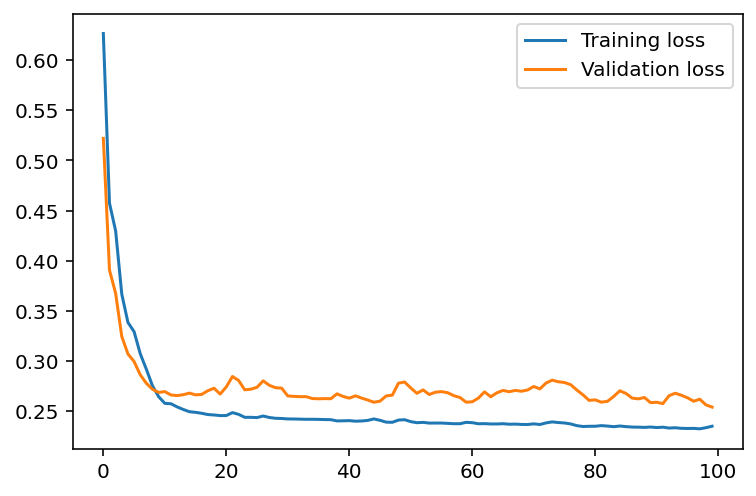

In [13]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()